In [1]:
import pandas as pd 
import numpy as np 
import extract_vector as ev
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit,LeaveOneOut,KFold
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def clean_train_data(train_data, train_label):
    """
    Input: train_data,train_label 
    Ouput: train_data,train_label 
           updated train data and updated train label after removing the nan rows
    """
    n = train_data.shape[0]
    m = train_data.shape[1]
    nan_ll = []
    for i in range(n):
        if(np.isnan(np.sum(train_data[i:i+1, :]))):
            nan_ll.append(i)

    train_data = np.delete(train_data, nan_ll, 0)
    train_label = np.delete(train_label, nan_ll, 0)
    return train_data, train_label

In [3]:
def get_train_labels(train_label):
    for i in train_label:
        if(i[0] > 4.5):
            i[0] = 1
        else:
            i[0] = 0

        if(i[1] > 4.5):
            i[1] = 1
        else:
            i[1] = 0
            
        if(i[2] > 4.5):
            i[2] = 1
        else:
            i[2] = 0
            
        if(i[3] > 4.5):
            i[3] = 1
        else:
            i[3] = 0
    return train_label

In [4]:
def get_emotion_label(labels):
    emo = []
    for i in labels:
        if(i[0] == 0 and i[1] == 0):
            emo.append(0)
        elif(i[0] == 1 and i[1] == 0):
            emo.append(1)
        elif(i[0] == 0 and i[1] == 1):
            emo.append(2)
        elif(i[0] == 1 and i[1] == 1):
            emo.append(3)
    return emo

## Wavelet Entropy Model

In [5]:
train_data = ev.getWaveletEntropyData()
train_label = ev.getLabelData(type='allfour')

In [6]:
train_data,train_label = clean_train_data(train_data,train_label)
train_label = get_train_labels(train_label)
arousal_label = train_label[:,0]
valence_label = train_label[:,1]
dominance_label=train_label[:,2]
liking_label=train_label[:,3]

In [7]:
train_label

array([[0., 1., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 1., 1.],
       ...,
       [0., 1., 1., 0.],
       [1., 0., 1., 1.],
       [1., 0., 0., 1.]])

In [8]:
sm1 = SMOTE()
sm2 = SMOTE()
sm3 = SMOTE()
sm4 = SMOTE()
train_a_data,arousal_label = sm1.fit_resample(train_data,arousal_label)
train_v_data,valence_label = sm2.fit_resample(train_data,valence_label)
train_d_data,dominance_label = sm3.fit_resample(train_data,dominance_label)
train_l_data,liking_label = sm4.fit_resample(train_data,liking_label)

In [9]:
x_a_train,x_a_test,y_a_train,y_a_test = train_test_split(train_a_data,arousal_label,test_size = 0.3,random_state = 42)
x_v_train,x_v_test,y_v_train,y_v_test = train_test_split(train_v_data,valence_label,test_size = 0.3,random_state = 42)
x_d_train,x_d_test,y_d_train,y_d_test = train_test_split(train_d_data,dominance_label,test_size = 0.3,random_state = 42)
x_l_train,x_l_test,y_l_train,y_l_test = train_test_split(train_l_data,liking_label,test_size = 0.3,random_state = 42)

### Arousal

In [10]:
arousal_model = SVC(kernel='rbf',C = 100)

In [11]:
arousal_model.fit(x_a_train,y_a_train)

SVC(C=100)

In [12]:
pred0 = arousal_model.predict(x_a_test)

In [13]:
print(classification_report(pred0,y_a_test))

              precision    recall  f1-score   support

         0.0       0.86      0.70      0.77       182
         1.0       0.65      0.83      0.73       123

    accuracy                           0.75       305
   macro avg       0.75      0.76      0.75       305
weighted avg       0.77      0.75      0.75       305



In [14]:
print(accuracy_score(pred0,y_a_test))

0.7508196721311475


In [15]:
print(classification_report(pred0,y_a_test))

              precision    recall  f1-score   support

         0.0       0.86      0.70      0.77       182
         1.0       0.65      0.83      0.73       123

    accuracy                           0.75       305
   macro avg       0.75      0.76      0.75       305
weighted avg       0.77      0.75      0.75       305



In [16]:
confusion_matrix(pred0,y_a_test)

array([[127,  55],
       [ 21, 102]], dtype=int64)

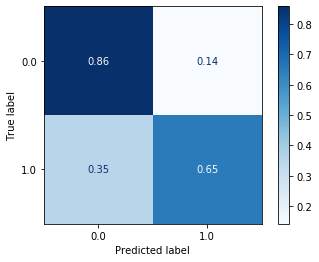

In [17]:
plot_confusion_matrix(arousal_model,x_a_test,y_a_test,normalize='true',cmap=plt.cm.Blues)

### K Fold Cross Validation:-

In [18]:
cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(arousal_model,train_a_data,arousal_label,scoring='accuracy',cv=cvkfold).mean()*100

74.62295081967213

### Leave One Out Cross Validation:-

In [19]:
loo = LeaveOneOut()
no_splits=loo.get_n_splits(train_a_data)
no_splits

1014

In [20]:
cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
cross_val_score(arousal_model,train_a_data,arousal_label,scoring='accuracy',cv=cvloocv).mean()*100

75.79655317360235

### Valence

In [21]:
valence_model = SVC(kernel='rbf',C = 100)

In [22]:
valence_model.fit(x_v_train,y_v_train)

SVC(C=100)

In [23]:
pred1 = valence_model.predict(x_v_test)

In [24]:
print(classification_report(pred1,y_v_test))

              precision    recall  f1-score   support

         0.0       0.68      0.60      0.63       156
         1.0       0.54      0.63      0.58       119

    accuracy                           0.61       275
   macro avg       0.61      0.61      0.61       275
weighted avg       0.62      0.61      0.61       275



In [25]:
print(accuracy_score(pred1,y_v_test))

0.610909090909091


In [26]:
confusion_matrix(pred1,y_v_test)

array([[93, 63],
       [44, 75]], dtype=int64)

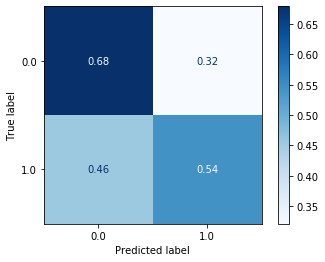

In [27]:
plot_confusion_matrix(valence_model,x_v_test,y_v_test,normalize='true',cmap=plt.cm.Blues)

### K Fold Cross Validation:-

In [28]:
cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(valence_model,train_v_data,valence_label,scoring='accuracy',cv=cvkfold).mean()*100

63.054545454545455

### Leave One Out Cross Validation:-

In [29]:
loo = LeaveOneOut()
no_splits=loo.get_n_splits(train_v_data)
no_splits

914

In [30]:
cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
cross_val_score(valence_model,train_v_data,valence_label,scoring='accuracy',cv=cvloocv).mean()*100

65.29858762681519

###  Dominance

In [31]:
dominance_model = SVC(kernel='rbf',C = 100)

In [32]:
dominance_model.fit(x_d_train,y_d_train)

SVC(C=100)

In [33]:
pred2 = dominance_model.predict(x_d_test)

In [34]:
print(classification_report(pred2,y_d_test))

              precision    recall  f1-score   support

         0.0       0.72      0.58      0.64       150
         1.0       0.52      0.67      0.58       100

    accuracy                           0.62       250
   macro avg       0.62      0.62      0.61       250
weighted avg       0.64      0.62      0.62       250



In [35]:
print(accuracy_score(pred2,y_d_test))

0.616


In [36]:
confusion_matrix(pred2,y_d_test)

array([[87, 63],
       [33, 67]], dtype=int64)

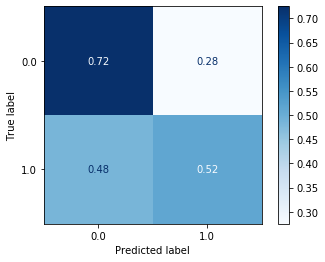

In [37]:
plot_confusion_matrix(dominance_model,x_d_test,y_d_test,normalize='true',cmap=plt.cm.Blues)

### K Fold Cross Validation:-

In [38]:
cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(dominance_model,train_d_data,dominance_label,scoring='accuracy',cv=cvkfold).mean()*100

60.88

### Leave One Out Cross Validation:-

In [39]:
loo = LeaveOneOut()
no_splits=loo.get_n_splits(train_d_data)
no_splits

832

In [40]:
cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
cross_val_score(dominance_model,train_d_data,dominance_label,scoring='accuracy',cv=cvloocv).mean()*100

61.67836538461538

### Liking

In [41]:
liking_model = SVC(kernel='rbf',C = 100)

In [42]:
liking_model.fit(x_l_train,y_l_train)

SVC(C=100)

In [43]:
pred3 = liking_model.predict(x_l_test)

In [44]:
print(classification_report(pred3,y_l_test))

              precision    recall  f1-score   support

         0.0       0.86      0.73      0.79       176
         1.0       0.73      0.86      0.79       151

    accuracy                           0.79       327
   macro avg       0.79      0.79      0.79       327
weighted avg       0.80      0.79      0.79       327



In [45]:
print(accuracy_score(pred3,y_l_test))

0.7889908256880734


In [46]:
confusion_matrix(pred3,y_l_test)

array([[128,  48],
       [ 21, 130]], dtype=int64)

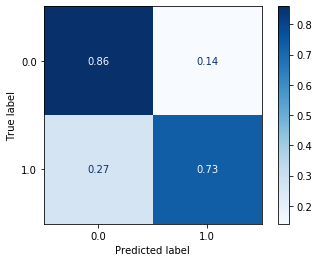

In [47]:
plot_confusion_matrix(liking_model,x_l_test,y_l_test,normalize='true',cmap=plt.cm.Blues)

### K Fold Cross Validation:-

In [48]:
cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(liking_model,train_l_data,liking_label,scoring='accuracy',cv=cvkfold).mean()*100

77.61467889908256

### Leave One Out Cross Validation:-

In [49]:
loo = LeaveOneOut()
no_splits=loo.get_n_splits(train_l_data)
no_splits

1088

In [50]:
cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
cross_val_score(liking_model,train_l_data,liking_label,scoring='accuracy',cv=cvloocv).mean()*100

76.80787911494873

### Emotion

In [51]:
# true_emotion = get_emotion_label(y_test)

In [52]:
# pred_emotion = np.array(list(zip(pred0,pred1)))
# pred_emotion = get_emotion_label(pred_emotion)

In [53]:
# confusion_matrix(true_emotion,pred_emotion)

In [54]:
# accuracy_score(true_emotion,pred_emotion)

## Fourier Entropy Model

In [55]:
train_data = ev.getFourierEntropyData()
train_label = ev.getLabelData(type='allfour')

In [56]:
train_data,train_label = clean_train_data(train_data,train_label)
train_label = get_train_labels(train_label)
arousal_label = train_label[:,0]
valence_label = train_label[:,1]
dominance_label=train_label[:,2]
liking_label=train_label[:,3]

In [57]:
sm1 = SMOTE()
sm2 = SMOTE()
sm3 = SMOTE()
sm4 = SMOTE()
train_a_data,arousal_label = sm1.fit_resample(train_data,arousal_label)
train_v_data,valence_label = sm2.fit_resample(train_data,valence_label)
train_d_data,dominance_label = sm3.fit_resample(train_data,dominance_label)
train_l_data,liking_label = sm4.fit_resample(train_data,liking_label)

In [58]:
x_a_train,x_a_test,y_a_train,y_a_test = train_test_split(train_a_data,arousal_label,test_size = 0.3,random_state = 42)
x_v_train,x_v_test,y_v_train,y_v_test = train_test_split(train_v_data,valence_label,test_size = 0.3,random_state = 42)
x_d_train,x_d_test,y_d_train,y_d_test = train_test_split(train_d_data,dominance_label,test_size = 0.3,random_state = 42)
x_l_train,x_l_test,y_l_train,y_l_test = train_test_split(train_l_data,liking_label,test_size = 0.3,random_state = 42)

### Arousal

In [59]:
arousal_model = SVC(kernel='rbf',C = 100)

In [60]:
arousal_model.fit(x_a_train,y_a_train)

SVC(C=100)

In [61]:
pred0 = arousal_model.predict(x_a_test)

In [62]:
print(classification_report(pred0,y_a_test))

              precision    recall  f1-score   support

         0.0       0.77      0.68      0.72       168
         1.0       0.66      0.75      0.70       137

    accuracy                           0.71       305
   macro avg       0.71      0.72      0.71       305
weighted avg       0.72      0.71      0.71       305



In [63]:
print(accuracy_score(pred0,y_a_test))

0.7114754098360656


In [64]:
confusion_matrix(pred0,y_a_test)

array([[114,  54],
       [ 34, 103]], dtype=int64)

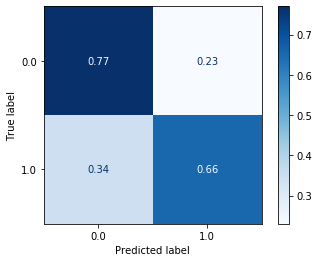

In [65]:
plot_confusion_matrix(arousal_model,x_a_test,y_a_test,normalize='true',cmap=plt.cm.Blues)

### K Fold Cross Validation:-

In [66]:
cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(arousal_model,train_a_data,arousal_label,scoring='accuracy',cv=cvkfold).mean()*100

74.81967213114756

### Leave One Out Cross Validation:-

In [67]:
loo = LeaveOneOut()
no_splits=loo.get_n_splits(train_a_data)
no_splits

1014

In [68]:
cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
cross_val_score(arousal_model,train_a_data,arousal_label,scoring='accuracy',cv=cvloocv).mean()*100

76.64920619523392

### Valence

In [69]:
valence_model = SVC(kernel='rbf',C = 100)

In [70]:
valence_model.fit(x_v_train,y_v_train)

SVC(C=100)

In [71]:
pred1 = valence_model.predict(x_v_test)

In [72]:
print(classification_report(pred1,y_v_test))

              precision    recall  f1-score   support

         0.0       0.71      0.61      0.66       158
         1.0       0.56      0.66      0.60       117

    accuracy                           0.63       275
   macro avg       0.63      0.64      0.63       275
weighted avg       0.64      0.63      0.63       275



In [73]:
print(accuracy_score(pred1,y_v_test))

0.6327272727272727


In [74]:
confusion_matrix(pred1,y_v_test)

array([[97, 61],
       [40, 77]], dtype=int64)

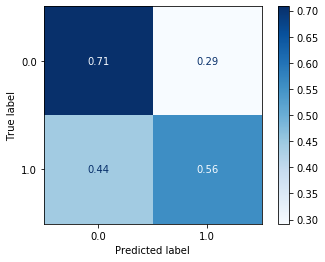

In [75]:
plot_confusion_matrix(valence_model,x_v_test,y_v_test,normalize='true',cmap=plt.cm.Blues)

### K Fold Cross Validation:-

In [76]:
cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(valence_model,train_v_data,valence_label,scoring='accuracy',cv=cvkfold).mean()*100

60.72727272727272

### Leave One Out Cross Validation:-

In [77]:
loo = LeaveOneOut()
no_splits=loo.get_n_splits(train_v_data)
no_splits

914

In [78]:
cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
cross_val_score(valence_model,train_v_data,valence_label,scoring='accuracy',cv=cvloocv).mean()*100

61.89178436443207

### Dominance

In [79]:
dominance_model = SVC(kernel='rbf',C = 100)

In [80]:
dominance_model.fit(x_d_train,y_d_train)

SVC(C=100)

In [81]:
pred2 = dominance_model.predict(x_d_test)

In [82]:
print(classification_report(pred2,y_d_test))

              precision    recall  f1-score   support

         0.0       0.73      0.61      0.67       144
         1.0       0.57      0.70      0.63       106

    accuracy                           0.65       250
   macro avg       0.65      0.65      0.65       250
weighted avg       0.66      0.65      0.65       250



In [83]:
print(accuracy_score(pred2,y_d_test))

0.648


In [84]:
confusion_matrix(pred2,y_d_test)

array([[88, 56],
       [32, 74]], dtype=int64)

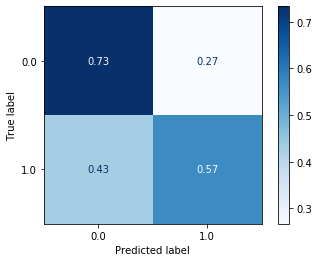

In [85]:
plot_confusion_matrix(dominance_model,x_d_test,y_d_test,normalize='true',cmap=plt.cm.Blues)

### K Fold Cross Validation:-

In [86]:
cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(dominance_model,train_d_data,dominance_label,scoring='accuracy',cv=cvkfold).mean()*100

63.2

### Leave One Out Cross Validation:-

In [87]:
loo = LeaveOneOut()
no_splits=loo.get_n_splits(train_d_data)
no_splits

832

In [88]:
cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
cross_val_score(dominance_model,train_d_data,dominance_label,scoring='accuracy',cv=cvloocv).mean()*100

61.34567307692307

### Liking

In [89]:
liking_model = SVC(kernel='rbf',C = 100)

In [90]:
liking_model.fit(x_l_train,y_l_train)

SVC(C=100)

In [91]:
pred3 = liking_model.predict(x_l_test)

In [92]:
print(classification_report(pred3,y_l_test))

              precision    recall  f1-score   support

         0.0       0.83      0.62      0.71       199
         1.0       0.58      0.80      0.67       128

    accuracy                           0.69       327
   macro avg       0.71      0.71      0.69       327
weighted avg       0.73      0.69      0.70       327



In [93]:
print(accuracy_score(pred3,y_l_test))

0.6941896024464832


In [94]:
confusion_matrix(pred3,y_l_test)

array([[124,  75],
       [ 25, 103]], dtype=int64)

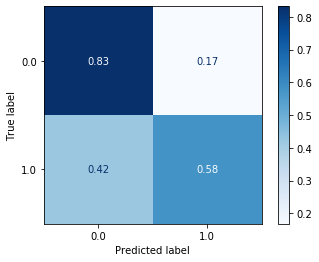

In [95]:
plot_confusion_matrix(liking_model,x_l_test,y_l_test,normalize='true',cmap=plt.cm.Blues)

### K Fold Cross Validation:-

In [96]:
cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
cross_val_score(liking_model,train_l_data,liking_label,scoring='accuracy',cv=cvkfold).mean()*100

71.37614678899082

### Leave One Out Cross Validation:-

In [97]:
loo = LeaveOneOut()
no_splits=loo.get_n_splits(train_l_data)
no_splits

1088

In [98]:
cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
cross_val_score(liking_model,train_l_data,liking_label,scoring='accuracy',cv=cvloocv).mean()*100

72.11082254002518

### Emotion

In [99]:
# true_emotion = get_emotion_label(y_test)

In [100]:
# pred_emotion = np.array(list(zip(pred0,pred1)))
# pred_emotion = get_emotion_label(pred_emotion)

In [101]:
# cm = confusion_matrix(true_emotion,pred_emotion)
# cm

In [102]:
# accuracy_score(true_emotion,pred_emotion)